## 1. Importación de paquetes y dataset

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [306]:
df = pd.read_csv("../data/credit-train.csv")

In [307]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## 2.EDA y Visual EDA

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [309]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [310]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### NaN Data

In [311]:
nan_columns = np.any(pd.isna(df), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [312]:
nan_columns

[]

## 3. Preprocessing data

#### Numeric Data

In [313]:
numeric_colmuns = []
numeric_colmuns.extend(list(df.dtypes[df.dtypes == np.int64].index))
numeric_colmuns.extend(list(df.dtypes[df.dtypes == np.float64].index))

In [314]:
numeric_colmuns.remove('y')
numeric_colmuns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

### Box Plot

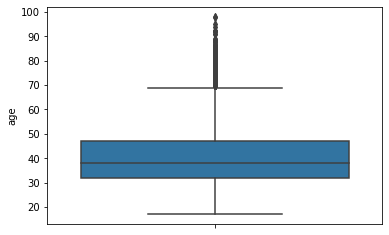

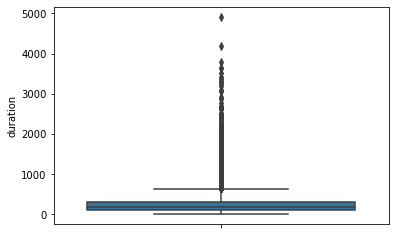

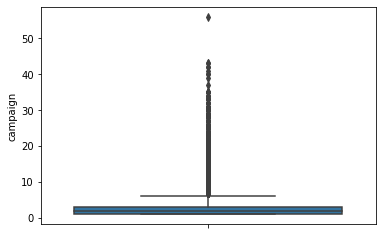

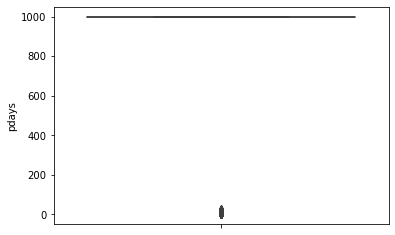

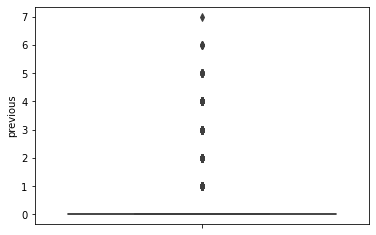

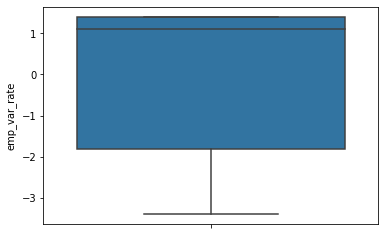

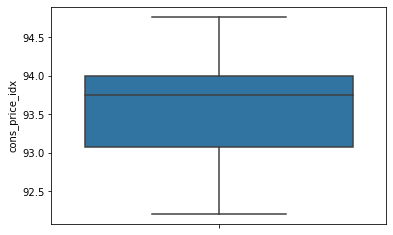

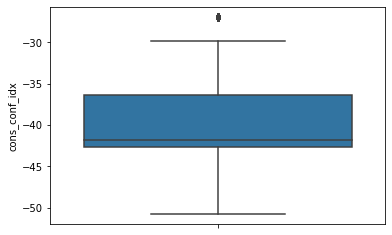

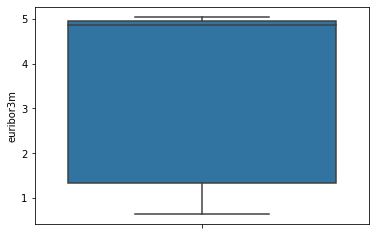

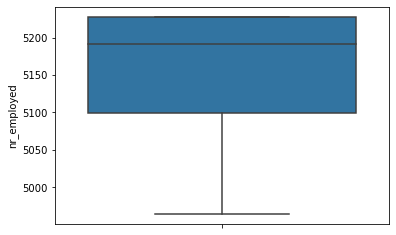

In [315]:
for var in numeric_colmuns:
    sns.boxplot(y=var,data=df)
    plt.show()

As we can see, in some numerical columns we have data deviated from the mean, but since there are many, we leave them.

### Convert yes/no to 1/0

This is done because it is simpler and better than creating a column of `housing_yes`, `housing_no`, since these will already contain the 0 and 1 depending on whether it has or not.

We take as the `unknown` value of the `default` column as a no to simplify the column

In [316]:
columns_to_change = ['default','housing','loan']
for col in columns_to_change:
    df[col] = df[col].map(dict(yes=1,no=0, unknown=0))
    
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,0,1,0,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,0,1,0,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,0,0,0,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,0,1,0,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,0,0,1,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,0,0,0,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,0,1,1,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,0,0,1,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


### Non-numeric columns to the dummy variables

Here the non-numeric columns are taken and the `get_dummies` method is used to convert them into new columns according to their values

In [317]:
non_numeric = df.select_dtypes(include=['object'])
non_numeric.head()

,job,marital,education,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,cellular,aug,thu,nonexistent
1,technician,married,unknown,cellular,nov,fri,nonexistent
2,management,single,university.degree,cellular,jun,thu,success
3,services,married,high.school,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,cellular,aug,fri,success


In [318]:
dummies = pd.get_dummies(non_numeric,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [319]:
df.shape

(41188, 21)

### Add the dummy to the dataframe

In [320]:
df = pd.concat([df,dummies],axis=1)
df.drop(columns=non_numeric.columns,axis=1,inplace=True)

In [321]:
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,0,1,0,210,1,999,0,1.4,93.444,...,0,0,0,0,0,1,0,0,1,0
1,53,0,0,0,138,1,999,0,-0.1,93.200,...,0,1,0,0,0,0,0,0,1,0
2,28,0,1,0,339,3,6,2,-1.7,94.055,...,0,0,0,0,0,1,0,0,0,1
3,39,0,0,0,185,2,999,0,-1.8,93.075,...,0,0,0,0,0,0,0,0,1,0
4,55,0,1,0,137,1,3,1,-2.9,92.201,...,0,0,0,0,0,0,0,0,0,1


In [322]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

### We look at the correlation of all columns

<AxesSubplot:>

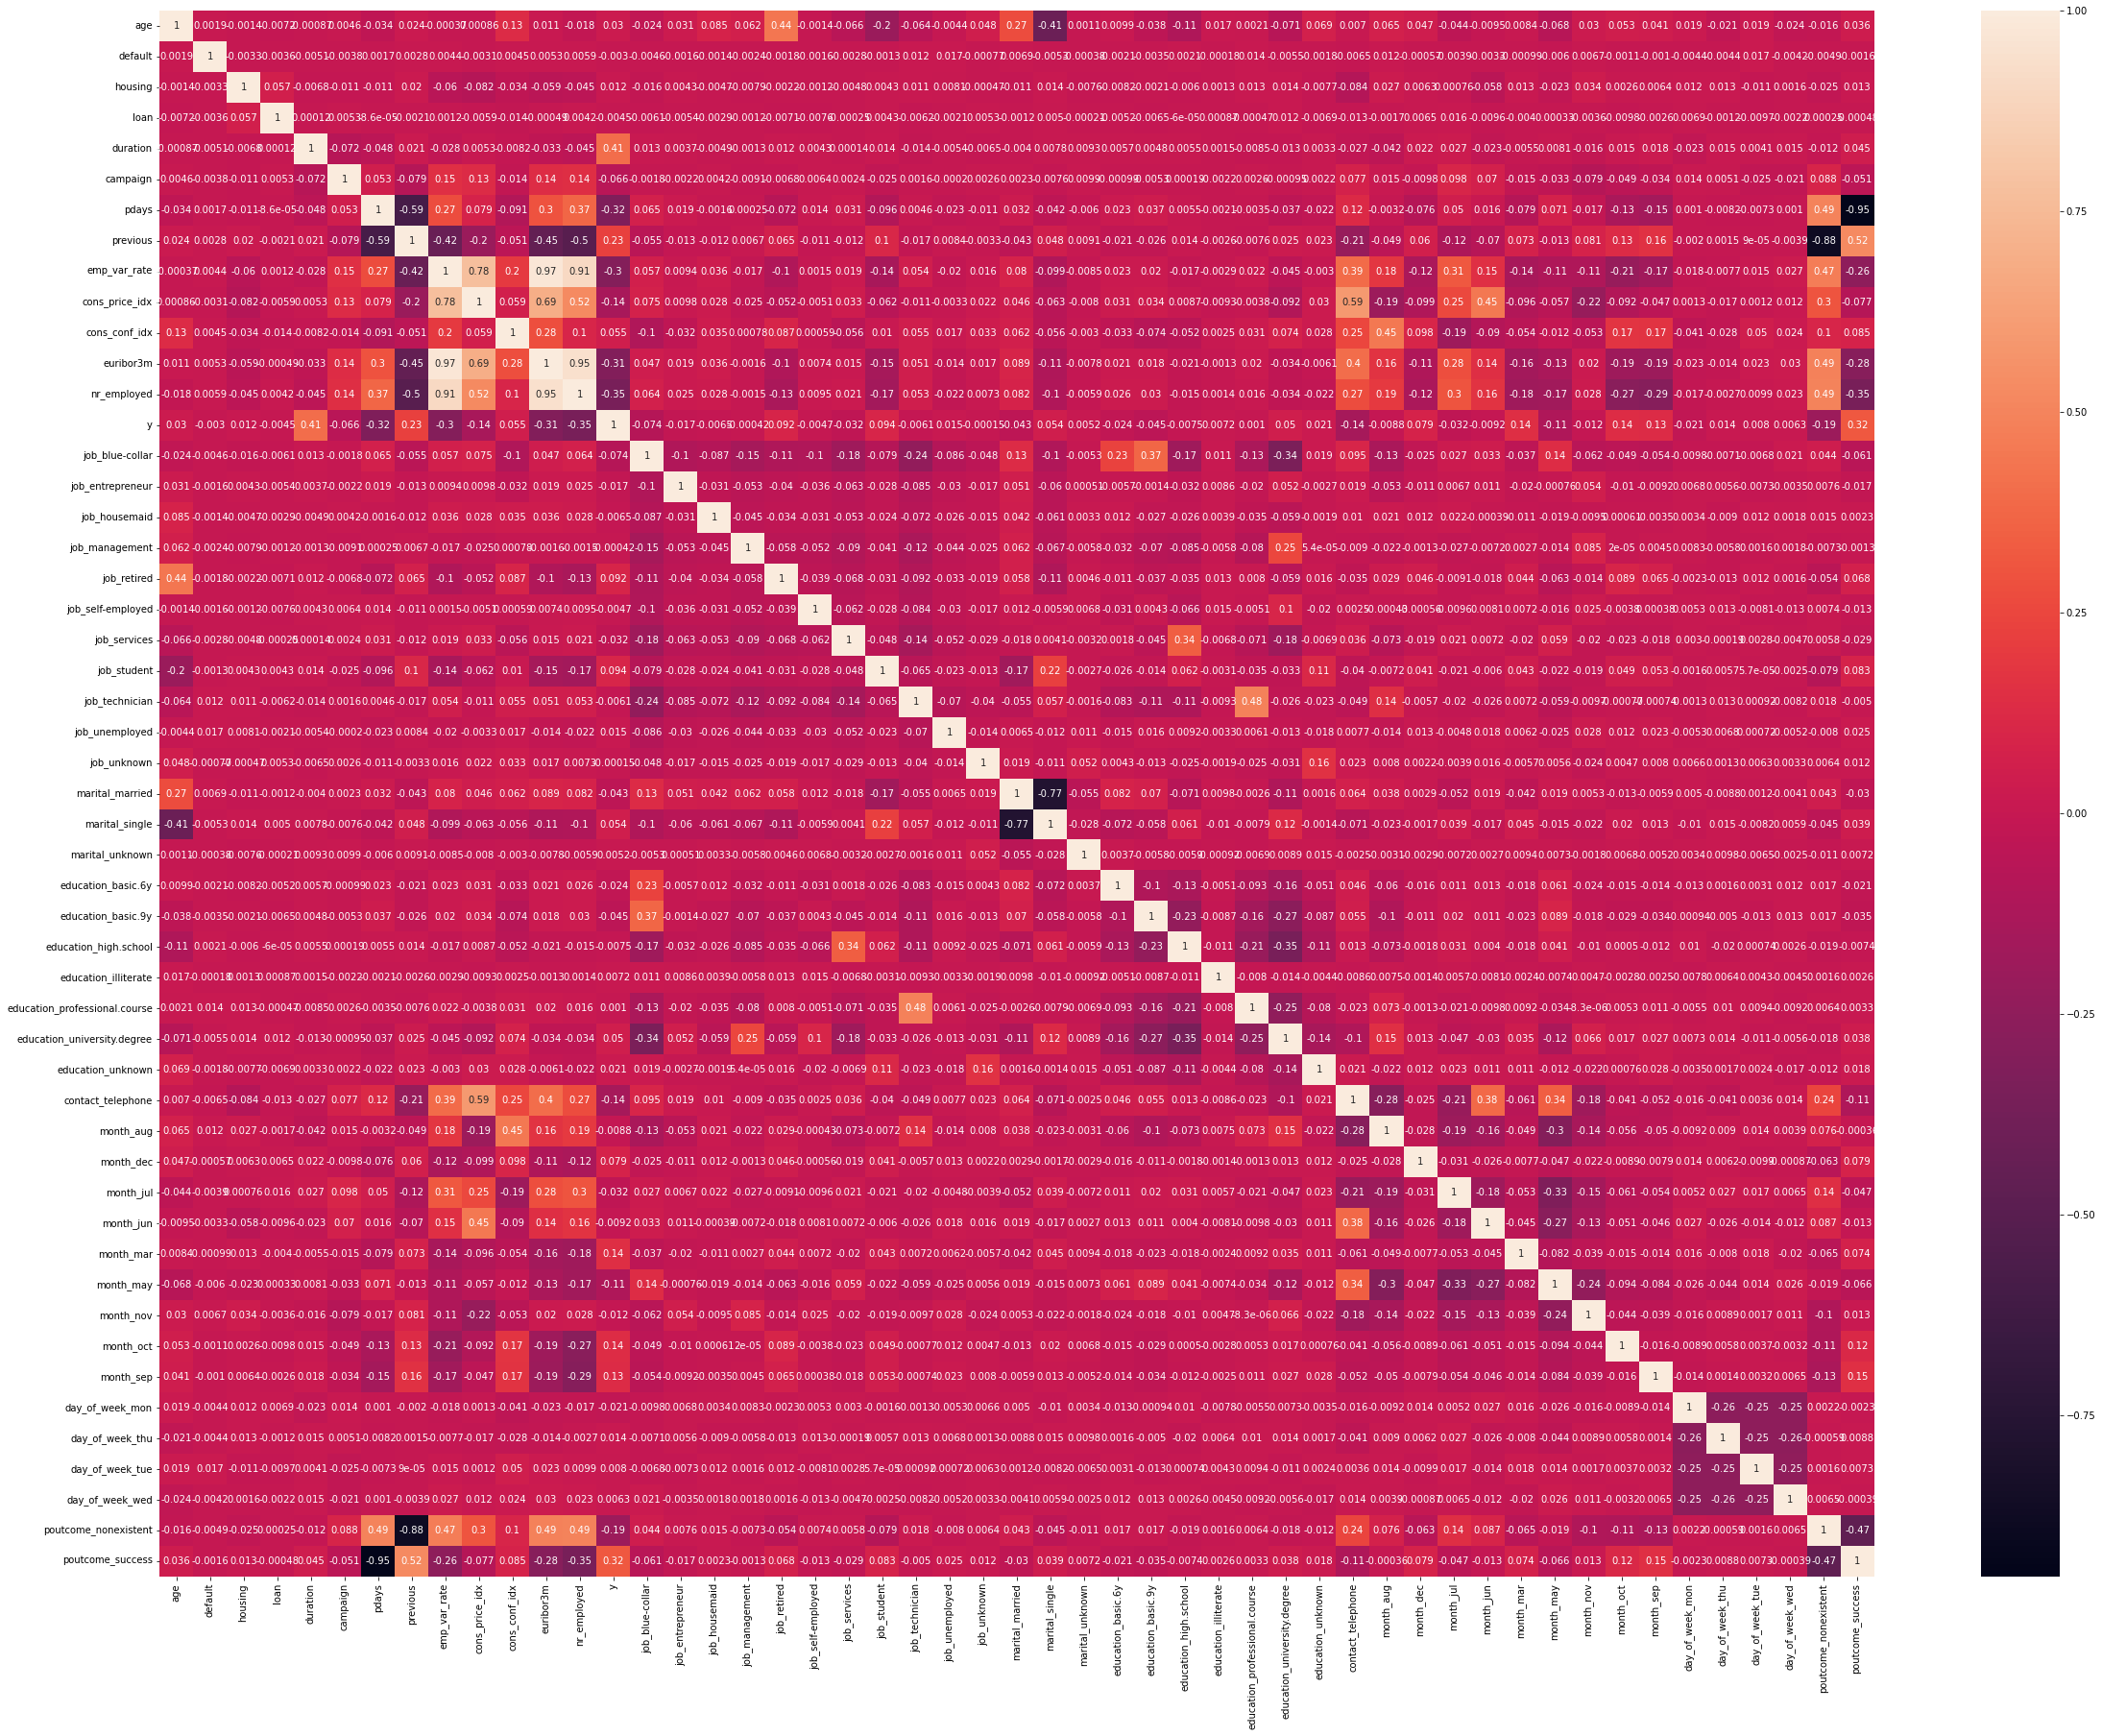

In [323]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

## 4. Creación del modelo y división del dataset

In [324]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [325]:
X = df.drop("y", axis = 1)
y = df["y"]

In [326]:
X.shape

(41188, 50)

In [327]:
y.shape

(41188,)

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [329]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (32950, 50)
Test feature set size: (8238, 50)
Training variable set size: (32950,)
Test variable set size: (8238,)


In [330]:
model = DecisionTreeClassifier()

## 5. Entrenamiento

In [331]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 6. Análisis de resultados

The mean accuracy on the given test data and labels.

In [332]:
score = model.score(X_test,y_test)
score

0.8908715707696043

The score is not very high, it could be better...

## 7. Realización de predicciones

In [333]:
prob_threshold = 0.5

prob_df=pd.DataFrame(model.predict_proba(X_test[:20]),columns=['Prob of NO','Prob of YES'])
prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)
prob_df

,Prob of NO,Prob of YES,Decision
0,1.0,0.0,0
1,0.0,1.0,1
2,1.0,0.0,0
3,1.0,0.0,0
4,1.0,0.0,0
5,1.0,0.0,0
6,1.0,0.0,0
7,1.0,0.0,0
8,1.0,0.0,0
9,1.0,0.0,0


In [334]:
y_test[:20]

32884    0
3169     1
32206    1
9403     0
14020    0
17201    1
879      0
23757    0
10821    0
14355    0
32311    0
31850    0
13595    0
21871    0
16735    0
8040     0
14064    0
17688    0
15507    0
37480    0
Name: y, dtype: int64

## 8. Visualización

In [335]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7295
           1       0.52      0.56      0.54       943

    accuracy                           0.89      8238
   macro avg       0.73      0.75      0.74      8238
weighted avg       0.89      0.89      0.89      8238



In [336]:
cm = metrics.confusion_matrix(y_test, model.predict(X_test))

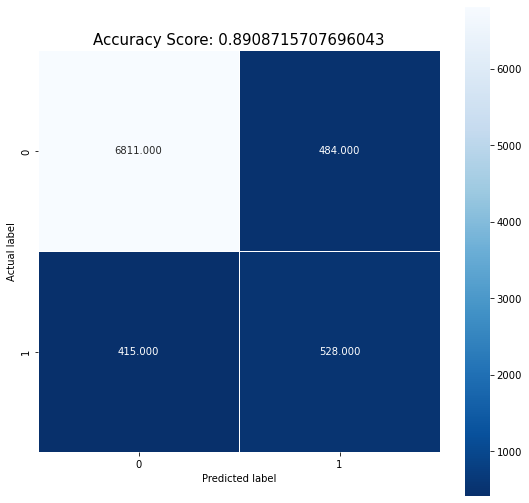

In [337]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The truth is that the predictions have been quite bad, especially with the positive ones, it has a very high tendency to mark more negatives.

You have marked 415 negatives when they should have been positives, and you have marked 484 positives when they should have been negatives.

In [338]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_12 <= 5087.65
|   |--- feature_4 <= 173.50
|   |   |--- feature_6 <= 7.50
|   |   |   |--- feature_4 <= 147.50
|   |   |   |   |--- feature_10 <= -30.75
|   |   |   |   |   |--- feature_9 <= 94.04
|   |   |   |   |   |   |--- feature_29 <= 0.50
|   |   |   |   |   |   |   |--- feature_4 <= 112.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 31.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 26.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  26.50
|   |   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.86
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_11 >  0.86
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |--- feature_0 >  31.50
|   |   |   |   |   |   |   |   |   |--- feature_28 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   | 

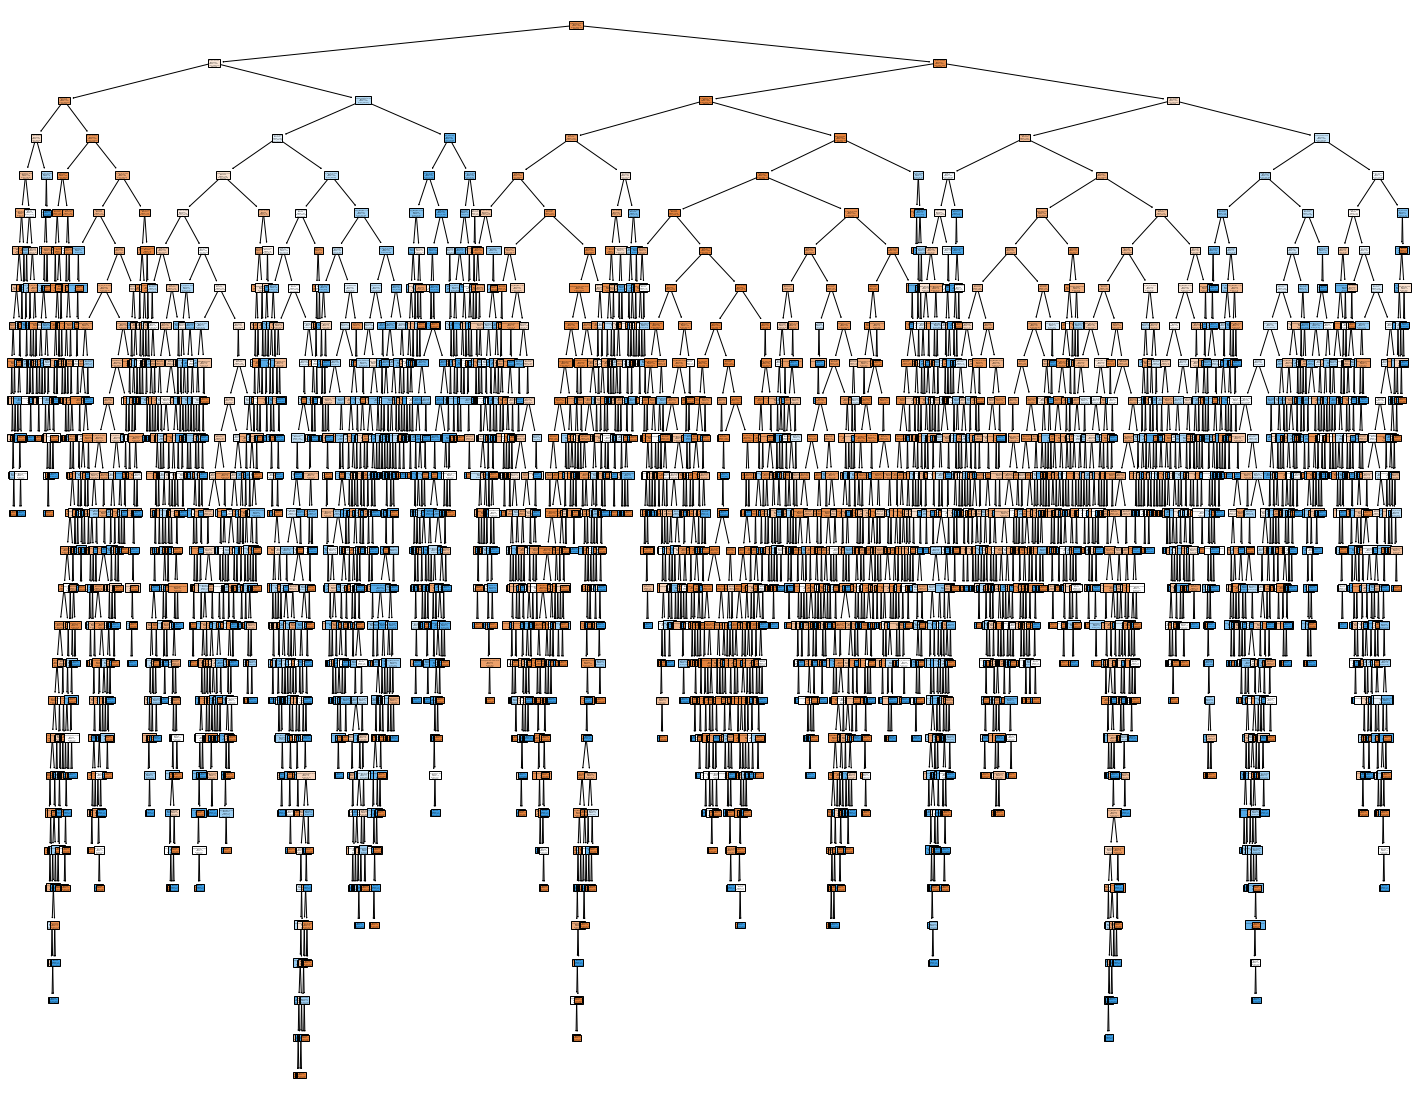

In [339]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=df.columns,  
                   class_names=df.columns,
                   filled=True)
